# 0. Overview
- Environmnt
  - Environment yields 2 (potentially different) scores. The maximum of these 2 scores is taken.
- Objectives
  - The goal is to get an average score of +0.5 over 100 consecutive episodes.
- Applied algorithms
  - Independent two DDPG agents  

# 1. Setup the environment
- Prepare unity environment with Tennis
- Import required libraries
- Import network

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt

from src_pytorch.Agent import DDPGAgent

# 2.  Get the default brain

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


# 3. Set hyperparameters

In [3]:
ACTION_SIZE = 2
STATE_SIZE = 24

TRAINING_EPISODES = 3000

LR_ACTOR = 1e-3
LR_CRITIC = 1e-3

HIDDEN_UNITS = [64, 64]

GAMMA = 0.99
TAU = 6e-2

EVERY = 100

NUM_AGENTS = 2

EPSILON = 0.3
EPSILON_DECAY = 1e-6

MEMORY_SIZE = int(1e6)
BATCH_SIZE = 128

# 4. Train

C:\Users\Lab\Anaconda3\envs\Udacity\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Ep: 100	In 100 epsidoes, Average Score: 0.03	Max Score: 0.20
Ep: 200	In 100 epsidoes, Average Score: 0.04	Max Score: 0.20
Ep: 300	In 100 epsidoes, Average Score: 0.04	Max Score: 0.29
Ep: 400	In 100 epsidoes, Average Score: 0.05	Max Score: 0.30
Ep: 500	In 100 epsidoes, Average Score: 0.05	Max Score: 0.40
Ep: 600	In 100 epsidoes, Average Score: 0.05	Max Score: 0.30
Ep: 700	In 100 epsidoes, Average Score: 0.07	Max Score: 0.30
Ep: 800	In 100 epsidoes, Average Score: 0.09	Max Score: 0.30
Ep: 900	In 100 epsidoes, Average Score: 0.09	Max Score: 0.30
Ep: 1000	In 100 epsidoes, Average Score: 0.10	Max Score: 0.30
Ep: 1100	In 100 epsidoes, Average Score: 0.10	Max Score: 0.50
Ep: 1200	In 100 epsidoes, Average Score: 0.11	Max Score: 0.40
Ep: 1300	In 100 epsidoes, Average Score: 0.14	Max Score: 0.40
Ep: 1400	In 100 epsidoes, Average Score: 0.39	Max Score: 2.60
Environment solved in 1416 epsidoes!	Average Score: 0.51


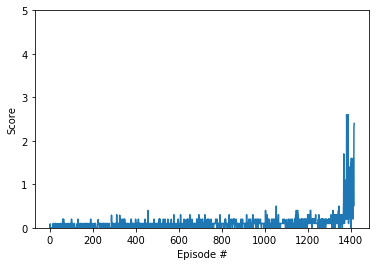

In [4]:
agents = [DDPGAgent(STATE_SIZE, ACTION_SIZE, 1234, HIDDEN_UNITS, LR_ACTOR, LR_CRITIC, BATCH_SIZE, GAMMA, MEMORY_SIZE, EPSILON, TAU) for i in range(NUM_AGENTS)]
prefix = 'model/p3_ddpg_agent'
suffix_actor = '_actor.pth'
suffix_critic = '_critic.pth'

total_scores = []
for ep in range(1, TRAINING_EPISODES+1):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations
    scores = np.zeros(NUM_AGENTS)

    for i in range(NUM_AGENTS):
        agents[i].reset()

    while True:
        actions = []
        for i in range(NUM_AGENTS):
            actions.append(agents[i].act(state[i], True))
        
        env_info = env.step(actions)[brain_name]
        reward = env_info.rewards
        next_state = env_info.vector_observations
        done = env_info.local_done

        for i in range(NUM_AGENTS):
            agents[i].step(state[i], actions[i], reward[i], next_state[i], done[i])
        state = next_state
        scores += list(map(lambda i: reward[i], range(NUM_AGENTS)))

        if np.any(done):
            break

    total_scores.append(max(scores))
    if ep > 0 and ep % 100 == 0:
        print("Ep: {}\tIn 100 epsidoes, Average Score: {:.2f}\tMax Score: {:.2f}"
              .format(ep, np.mean(total_scores[-100:]), np.max(total_scores[-100:])))

    if np.mean(total_scores[-100:]) > 0.5:
        print("Environment solved in {} epsidoes!\tAverage Score: {:.2f}".format(ep, np.mean(total_scores[-100:])))
        for i in range(NUM_AGENTS):
            torch.save(agents[i].actor_local.state_dict(), prefix + str(i) + suffix_actor)
            torch.save(agents[i].critic_local.state_dict(), prefix + str(i) + suffix_critic)
        break           

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([0, 5])
plt.plot(np.arange(1, len(total_scores)+1), total_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()   

# 5. Validation

1 epsidoe score: 2.60, Average score: 2.60
2 epsidoe score: 2.60, Average score: 2.60
3 epsidoe score: 0.90, Average score: 2.03
4 epsidoe score: 0.00, Average score: 1.53
5 epsidoe score: 2.60, Average score: 1.74
6 epsidoe score: 0.20, Average score: 1.48
7 epsidoe score: 0.80, Average score: 1.39
8 epsidoe score: 1.99, Average score: 1.46
9 epsidoe score: 2.00, Average score: 1.52
10 epsidoe score: 0.00, Average score: 1.37
11 epsidoe score: 1.10, Average score: 1.34
12 epsidoe score: 2.60, Average score: 1.45
13 epsidoe score: 0.00, Average score: 1.34
14 epsidoe score: 0.50, Average score: 1.28
15 epsidoe score: 2.60, Average score: 1.37
16 epsidoe score: 0.09, Average score: 1.29
17 epsidoe score: 1.90, Average score: 1.32
18 epsidoe score: 2.20, Average score: 1.37
19 epsidoe score: 2.10, Average score: 1.41
20 epsidoe score: 2.30, Average score: 1.45
21 epsidoe score: 1.80, Average score: 1.47
22 epsidoe score: 1.90, Average score: 1.49
23 epsidoe score: 0.40, Average score: 1.

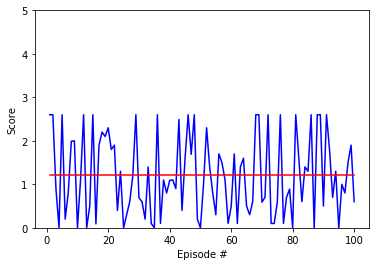

Average Score: 1.20


In [6]:
trained_agents = [DDPGAgent(STATE_SIZE, ACTION_SIZE, 1234, HIDDEN_UNITS, LR_ACTOR, LR_CRITIC, BATCH_SIZE, GAMMA, MEMORY_SIZE, EPSILON, TAU) for i in range(NUM_AGENTS)]
for i in range(NUM_AGENTS):
    trained_agents[i].actor_local.load_state_dict(torch.load(prefix + str(i) + suffix_actor))
    trained_agents[i].critic_local.load_state_dict(torch.load(prefix + str(i) + suffix_critic))

total_scores = []
for ep in range(1, 101):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations             
    scores = np.zeros(NUM_AGENTS)                                        
    while True:
        actions = []
        for i in range(NUM_AGENTS):
            actions.append(agents[i].act(state[i], False))        
        env_info = env.step(actions)[brain_name]      
        state = env_info.vector_observations         
        reward = env_info.rewards                         
        done = env_info.local_done                        
        scores += list(map(lambda i: reward[i], range(NUM_AGENTS)))               
        if np.any(done):                                  
            break
    total_scores.append(max(scores))
    print("{} epsidoe score: {:.2f}, Average score: {:.2f}".format(ep, max(scores), np.mean(total_scores)))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([0, 5])
x = range(1, len(total_scores)+1)
ax.plot(x, total_scores, color='blue')
ax.plot(x, np.ones_like(x) * np.mean(total_scores), color='red')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()   
print('Average Score: {:.2f}'.format(np.mean(total_scores)))

In [7]:
env.close()